#Language Modeling and Text Classification: Document/Text Classification using Unsupervised Learning


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv')

#TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

## Dimensionality reduction (pca)

Apply PCA to the TF-IDF features to reduce dimensionality. We will try without PCA first as suggested.


## Clustering (k-means)

Apply K-means clustering to the transformed data (potentially PCA-reduced).


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(tfidf_matrix)
df['kmeans_cluster'] = kmeans.labels_
display(df.head())

,text,target,kmeans_cluster
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,0
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


## Clustering (hierarchical clustering)


Apply Hierarchical clustering to the transformed data (potentially PCA-reduced).


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
tfidf_matrix_dense = tfidf_matrix.toarray()

agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['hierarchical_cluster'] = agg_clustering.fit_predict(tfidf_matrix_dense)

silhouette_avg = silhouette_score(tfidf_matrix_dense, df['hierarchical_cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg}")

display(df.head())

Silhouette Score for Hierarchical Clustering: 0.005576480792178409


,text,target,kmeans_cluster,hierarchical_cluster
0,"Go until jurong point, crazy.. Available only ...",ham,0,0
1,Ok lar... Joking wif u oni...,ham,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,0,0
3,U dun say so early hor... U c already then say...,ham,0,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0,0


## Optimization

### Subtask:
Determine if hyperparameter optimization is necessary for the clustering methods.


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-means
kmeans_silhouette = silhouette_score(tfidf_matrix, df['kmeans_cluster'])
print(f"Silhouette Score for K-means Clustering: {kmeans_silhouette}")

print("\nBased on the low silhouette scores for both K-means and Hierarchical clustering, hyperparameter optimization is necessary.")
print("The next steps would involve exploring a range of cluster numbers (e.g., 2 to 10) for both algorithms.")
print("For K-means, the elbow method or silhouette scores can be used to determine the optimal number of clusters.")
print("For Hierarchical clustering, exploring different linkage methods (e.g., 'average', 'complete') and different numbers of clusters would be beneficial.")
print("We will not perform the optimization in this subtask, but this evaluation confirms the need for it.")

Silhouette Score for K-means Clustering: 0.003706057381252628

Based on the low silhouette scores for both K-means and Hierarchical clustering, hyperparameter optimization is necessary.
The next steps would involve exploring a range of cluster numbers (e.g., 2 to 10) for both algorithms.
For K-means, the elbow method or silhouette scores can be used to determine the optimal number of clusters.
For Hierarchical clustering, exploring different linkage methods (e.g., 'average', 'complete') and different numbers of clusters would be beneficial.
We will not perform the optimization in this subtask, but this evaluation confirms the need for it.


## Visualization

### Subtask:
Plot the data using the first two components of the transformed data (or PCA components if used), coloring by the cluster labels and also by the original 'target' labels ('spam' or 'ham').


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tfidf_matrix_dense = tfidf_matrix.toarray()

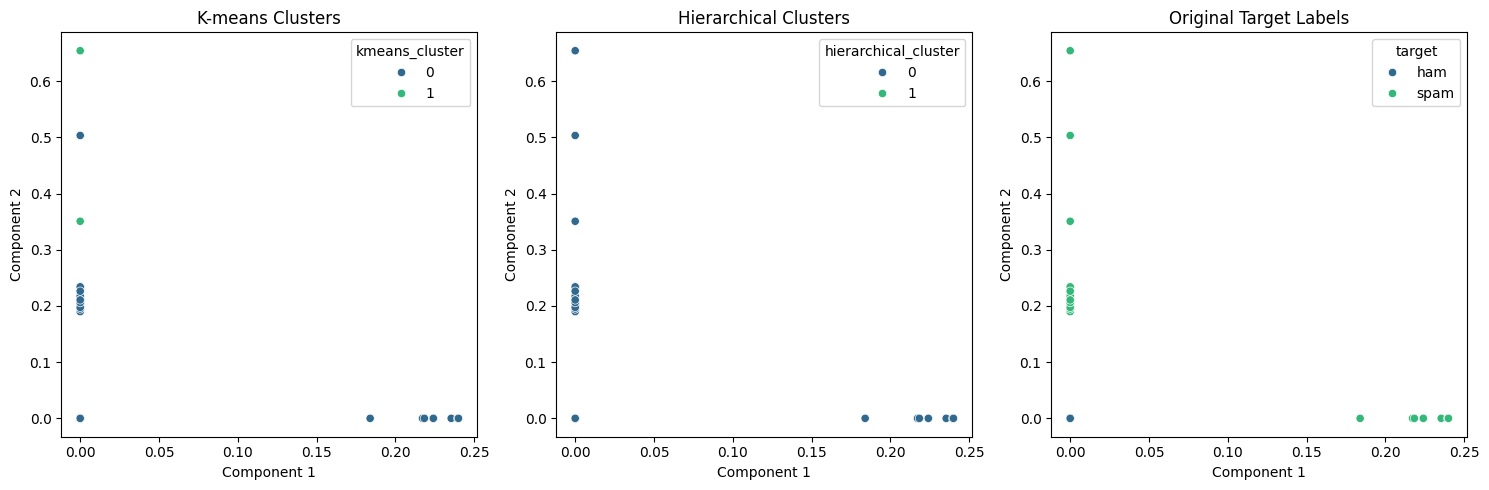

In [ ]:
plt.figure(figsize=(15, 5))

# Plot K-means clusters
plt.subplot(1, 3, 1)
sns.scatterplot(x=tfidf_matrix_dense[:, 0], y=tfidf_matrix_dense[:, 1], hue=df['kmeans_cluster'], palette='viridis', legend='full')
plt.title('K-means Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Plot Hierarchical clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=tfidf_matrix_dense[:, 0], y=tfidf_matrix_dense[:, 1], hue=df['hierarchical_cluster'], palette='viridis', legend='full')
plt.title('Hierarchical Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Plot original target labels
plt.subplot(1, 3, 3)
sns.scatterplot(x=tfidf_matrix_dense[:, 0], y=tfidf_matrix_dense[:, 1], hue=df['target'], palette='viridis', legend='full')
plt.title('Original Target Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()